In [2]:
% run 1-datasource.ipynb

In [3]:
% run 4-graph-utils-2.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
import scipy.sparse.csgraph
from tensorboardX import SummaryWriter
import skimage.transform as transform
import networkx as nx
from scipy import spatial

In [5]:
#from pygsp.reduction import graph_sparsify#, kron_reduction
from pygsp import graphs, filters, utils
from scipy.sparse.linalg import eigsh
from scipy.sparse import linalg
from scipy import sparse, stats
from sklearn.cluster import SpectralClustering

In [6]:
icebergs.head()

,band_1,band_2,inc_angle,is_iceberg
id,,,,
dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


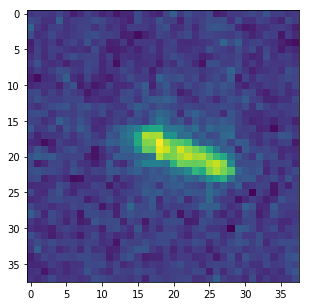

In [7]:
test = transform.rescale(icebergs.band_1.iloc[100].reshape(75, 75), 0.5, mode='constant')
plt.imshow(test);

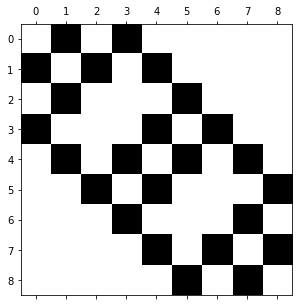

In [8]:
plt.spy(distance(grid(3), k=1, metric='cityblock'));

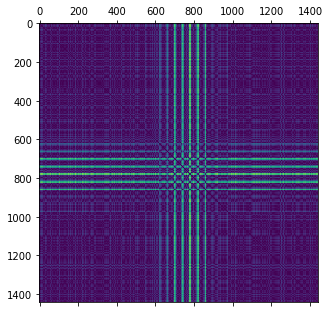

In [9]:
test_dist = spatial.distance.squareform(spatial.distance.pdist(test.reshape(-1, 1), metric='euclidean'))
plt.matshow(test_dist);

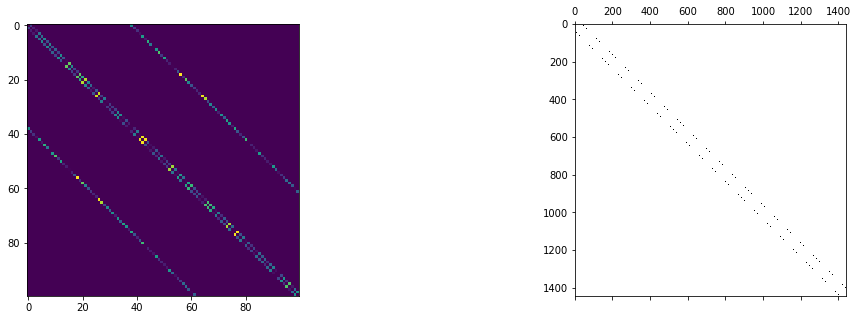

In [10]:
test_dist[np.where(distance(grid(38), k=2) == 0)] = 0

plt.subplot(121)
plt.imshow(test_dist[:100, :100])

plt.subplot(122)
plt.spy(test_dist);

In [11]:
G = graphs.Graph(test_dist)
G.set_coordinates()

690, 2010

370, 1379

In [11]:
test_dist.shape

(1444, 1444)

In [13]:
graphs, perm = coarsen_amg(sparse.csr_matrix(test_dist), levels=2)

Layer 0: M_0 = |V| = 1444 nodes (0 added),|E| = 2812 edges
Layer 1: M_1 = |V| = 722 nodes (0 added),|E| = 1491 edges
Layer 2: M_2 = |V| = 361 nodes (0 added),|E| = 886 edges


In [14]:
perm

[161,
 47,
 0,
 1,
 2,
 3,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 22,
 23,
 24,
 25,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 43,
 44,
 45,
 46,
 49,
 50,
 51,
 54,
 55,
 57,
 60,
 61,
 62,
 63,
 69,
 70,
 72,
 75,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 92,
 93,
 94,
 98,
 100,
 101,
 102,
 103,
 107,
 108,
 109,
 110,
 113,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 124,
 126,
 128,
 131,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 141,
 142,
 145,
 146,
 147,
 148,
 154,
 155,
 157,
 159,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 183,
 184,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 195,
 197,
 201,
 202,
 203,
 206,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 216,
 217,
 224,
 227,
 228,
 230,
 231,
 235,
 236,
 237,
 238,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 250,
 251,
 252,
 254,
 255,
 257,
 258,
 260,
 262,
 263,
 264,
 265,
 266,
 268,
 269,
 270,
 272,
 273,
 274,
 275,
 276,
 281,
 282,
 283,
 285,


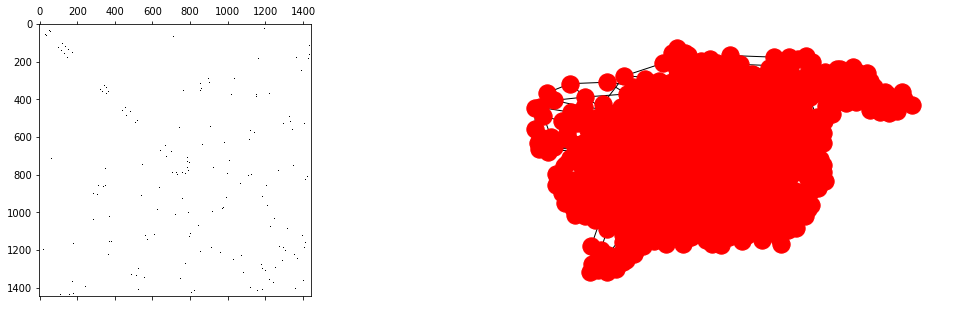

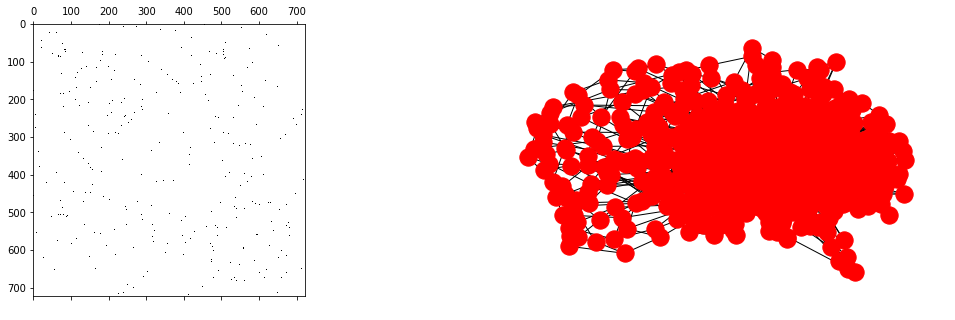

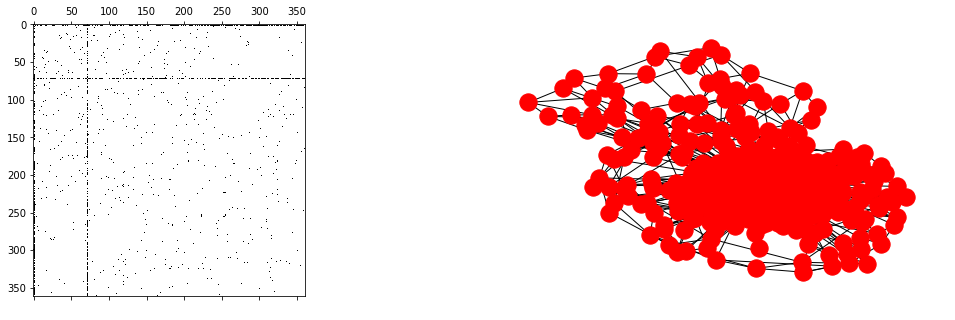

In [15]:
for g in graphs:
    plt.subplot(121)
    plt.spy(g.todense())
    plt.subplot(122)
    nx.draw(nx.from_numpy_array(g.todense()))
    plt.show()

In [21]:
gr = grid(16)
gr.shape

(256, 2)

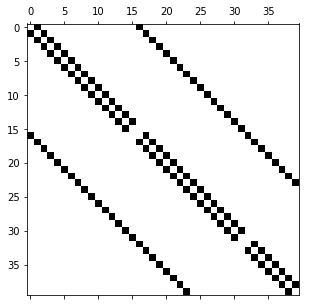

In [22]:
mask = distance(gr, k=2) > 0
plt.spy(mask[:40, :40]);

In [23]:
graphs, perm = coarsen_amg(sp.sparse.csr.csr_matrix(mask), levels=3, self_connections=False)

Layer 0: M_0 = |V| = 256 nodes (0 added),|E| = 480 edges
Layer 1: M_1 = |V| = 128 nodes (0 added),|E| = 328 edges
Layer 2: M_2 = |V| = 64 nodes (0 added),|E| = 206 edges
Layer 3: M_3 = |V| = 32 nodes (0 added),|E| = 138 edges


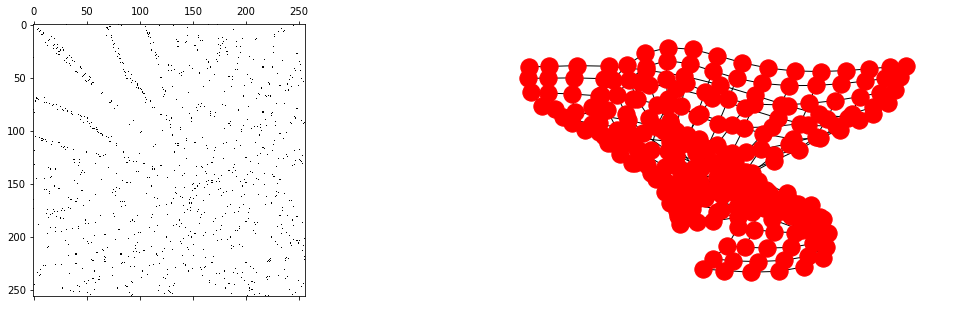

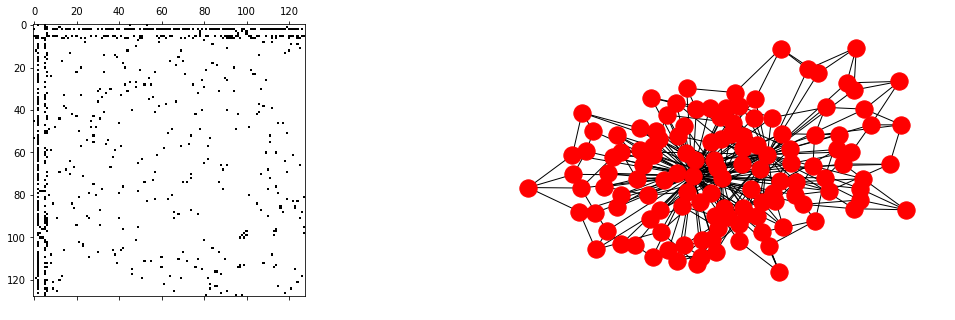

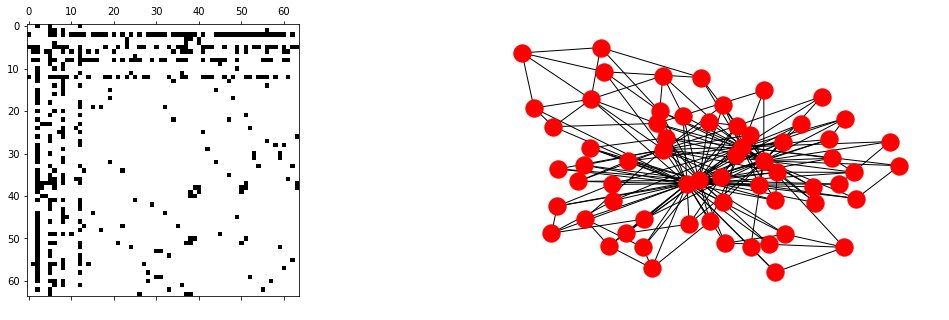

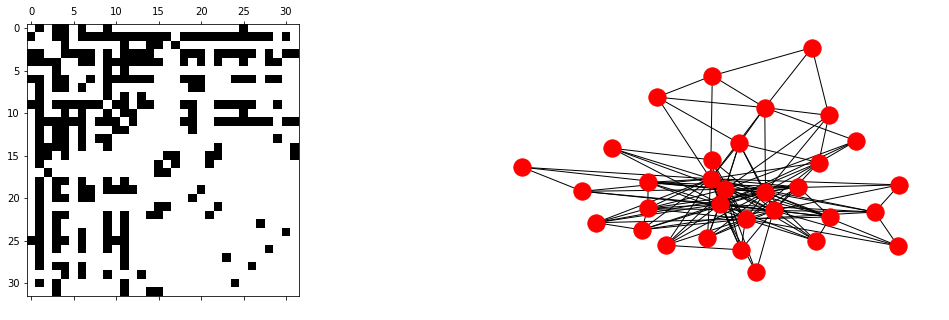

In [24]:
for g in graphs:
    plt.subplot(121)
    plt.spy(g.todense())
    plt.subplot(122)
    nx.draw(nx.from_numpy_array(g.todense()))
    plt.show()